<center>
    <img src="https://gitlab.com/ibm/skills-network/courses/placeholder101/-/raw/master/labs/module%201/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


# **Data Visualization**


Estimated time needed: **30** minutes


In this lab, you will learn how to visualize and interpret data


## Objectives


-   Import Libraries
-   Lab Exercises
    -   Identifying duplicates
    -   Plotting Scatterplots
    -   Plotting Boxplots


* * *


## Import Libraries


All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented. If you run this notebook in a different environment, e.g. your desktop, you may need to uncomment and install certain libraries.


In [ ]:
# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install seaborn

Import the libraries we need for the lab


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

Read in the csv file from the url using the request library


In [2]:
ratings_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/teachingratings.csv'
ratings_df = pd.read_csv(ratings_url)

## Lab Exercises


### Identify all duplicate cases using prof. Using all observations, find the average and standard deviation for age. Repeat the analysis by first filtering the data set to include one observation for each instructor with a total number of observations restricted to 94.


Identify all duplicate cases using prof variable - find the unique values of the prof variables


In [3]:
np.sort (ratings_df.prof.unique()) 

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94])

Print out the number of unique values in the prof variable


In [4]:
ratings_df.prof.nunique()

94

Using all observations, Find the average and standard deviation for age


In [5]:
ratings_df['age'].mean()

48.365010799136066

In [6]:
ratings_df['age'].std()

9.80274203786482

Repeat the analysis by first filtering the data set to include one observation for each instructor with a total number of observations restricted to 94.

> first we drop duplicates using prof as a subset and assign it a new dataframe name called no_duplicates_ratings_df


In [7]:
no_duplicates_ratings_df = ratings_df.drop_duplicates(subset =['prof'])
no_duplicates_ratings_df.head()

,minority,age,gender,credits,beauty,eval,division,native,tenure,students,allstudents,prof,PrimaryLast,vismin,female,single_credit,upper_division,English_speaker,tenured_prof
0,yes,36,female,more,0.289916,4.3,upper,yes,yes,24,43,1,0,1,1,0,1,1,1
4,no,59,male,more,-0.737732,4.5,upper,yes,yes,17,20,2,0,0,0,0,1,1,1
7,no,51,male,more,-0.571984,3.7,upper,yes,yes,55,55,3,0,0,0,0,1,1,1
9,no,40,female,more,-0.677963,4.3,upper,yes,yes,40,46,4,0,0,1,0,1,1,1
17,no,31,female,more,1.509794,4.4,upper,yes,yes,42,48,5,0,0,1,0,1,1,1


> Use the new dataset to get the mean of age


In [8]:
no_duplicates_ratings_df['age'].mean()

47.5531914893617

In [9]:
no_duplicates_ratings_df['age'].std()

10.25651329515495

### Using a bar chart, demonstrate if instructors teaching lower-division courses receive higher average teaching evaluations.


In [10]:
ratings_df.head()

,minority,age,gender,credits,beauty,eval,division,native,tenure,students,allstudents,prof,PrimaryLast,vismin,female,single_credit,upper_division,English_speaker,tenured_prof
0,yes,36,female,more,0.289916,4.3,upper,yes,yes,24,43,1,0,1,1,0,1,1,1
1,yes,36,female,more,0.289916,3.7,upper,yes,yes,86,125,1,0,1,1,0,1,1,1
2,yes,36,female,more,0.289916,3.6,upper,yes,yes,76,125,1,0,1,1,0,1,1,1
3,yes,36,female,more,0.289916,4.4,upper,yes,yes,77,123,1,1,1,1,0,1,1,1
4,no,59,male,more,-0.737732,4.5,upper,yes,yes,17,20,2,0,0,0,0,1,1,1


Find the average teaching evaluation in both groups of upper and lower-division


In [12]:
division_eval = ratings_df.groupby('division')[['eval']].mean().reset_index()
division_eval

,division,eval
0,lower,4.087261
1,upper,3.952614


Plot the barplot using the seaborn library


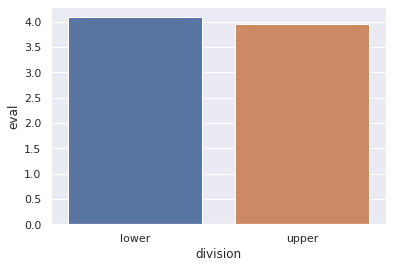

In [18]:
sns.set(style="darkgrid")
ax = sns.barplot(x="division", y="eval", data=division_eval)

### Plot the relationship between age and teaching evaluation scores.


Create a scatterplot with the scatterplot function in the seaborn library


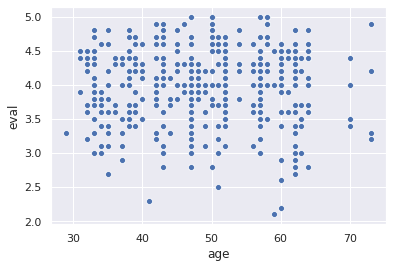

In [19]:
ax = sns.scatterplot(x='age', y='eval', data=ratings_df)

### Using gender-differentiated scatter plots, plot the relationship between age and teaching evaluation scores.


Create a scatterplot with the scatterplot function in the seaborn library this time add the <code>hue</code> argument


In [ ]:
ax = sns.scatterplot(x='age', y='eval', hue='gender',
                     data=ratings_df)

### Create a box plot for beauty scores differentiated by credits.


We use the <code>boxplot()</code> function from the seaborn library


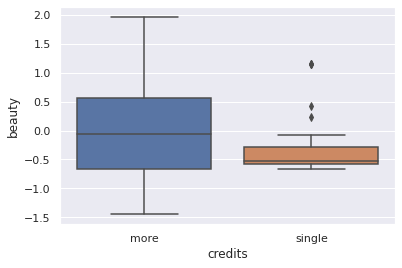

In [20]:
ax = sns.boxplot(x='credits', y='beauty', data=ratings_df)

### What is the number of courses taught by gender?


We use the <code>catplot()</code> function from the seaborn library


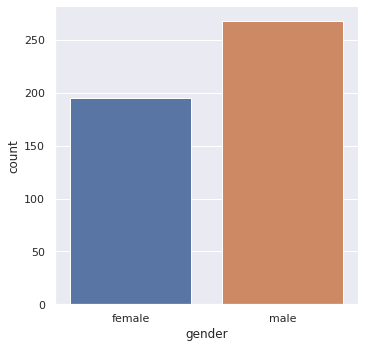

In [23]:
sns.catplot(x='gender', kind='count', data=ratings_df)

### Create a group histogram of taught by gender and tenure


We will add the <code>hue = Tenure</code> argument


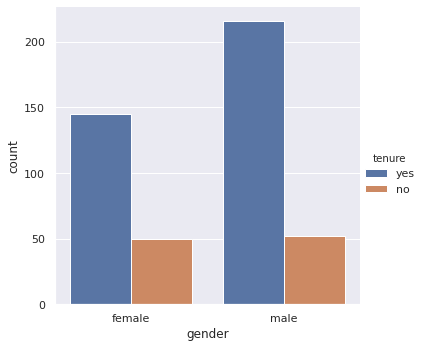

In [24]:
sns.catplot(x='gender', hue = 'tenure', kind='count', data=ratings_df)

### Add division as another factor to the above histogram


We add another argument named <code>row</code> and use the division variable as the row


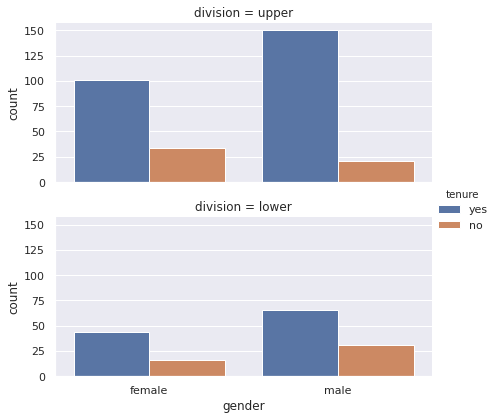

In [25]:
sns.catplot(x='gender', hue = 'tenure', row = 'division',
            kind='count', data=ratings_df,
            height = 3, aspect = 2)

### Create a scatterplot of age and evaluation scores, differentiated by gender and tenure


Use the <code>relplot()</code> function for complex scatter plots


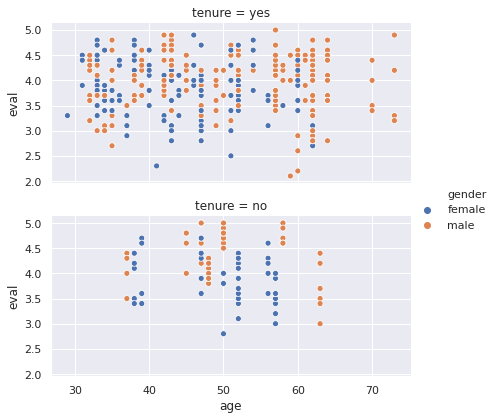

In [28]:
sns.relplot(x="age", y="eval", hue="gender",
            row="tenure",
            data=ratings_df, height = 3, aspect = 2)

### Create a distribution plot of teaching evaluation scores


We use the <code>distplot()</code> function from the seaborn library, set <code>kde = false</code> because we don'e need the curve


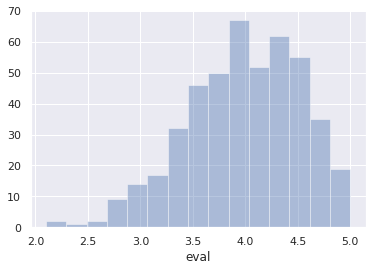

In [33]:
ax = sns.distplot(ratings_df['eval'], kde = False)

### Create a distribution plot of teaching evaluation score with gender as a factor


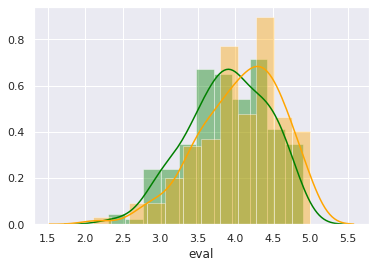

In [32]:
## use the distplot function from the seaborn library
sns.distplot(ratings_df[ratings_df['gender'] == 'female']['eval'], color='green', kde=True) 
sns.distplot(ratings_df[ratings_df['gender'] == 'male']['eval'], color="orange", kde=True) 
plt.show()

### Create a box plot - age of the instructor by gender


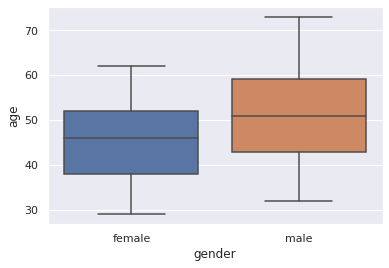

In [34]:
ax = sns.boxplot(x="gender", y="age", data=ratings_df)

### Compare age along with tenure and gender


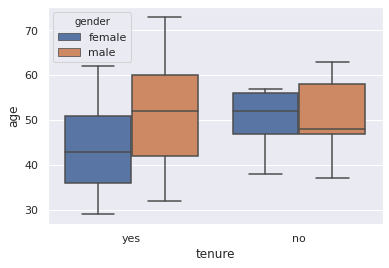

In [37]:
ax = sns.boxplot(x="tenure", y="age", hue="gender",
                 data=ratings_df)

## Practice Questions


### Question 1: Create a distribution plot of beauty scores with Native English speaker as a factor

-   Make the color of the native English speakers plot - orange and non - native English speakers - blue


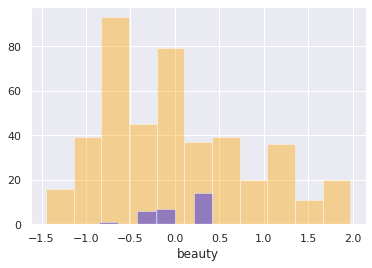

In [43]:
## insert code
sns.distplot(ratings_df[ratings_df['native'] == 'yes']['beauty'] , color='orange' , kde = False)
sns.distplot(ratings_df[ratings_df['native'] == 'no' ]['beauty'], color='blue' , kde = False)
plt.show()

Double-click **here** for the solution.

<!-- The answer is below:
sns.distplot(ratings_df[ratings_df['native'] == 'yes']['beauty'], color="orange", kde=False) 
sns.distplot(ratings_df[ratings_df['native'] == 'no']['beauty'], color="blue", kde=False) 
plt.show()
-->


### Question 2: Create a Horizontal box plot of the age of the instructors by visible minority


<AxesSubplot:xlabel='minority', ylabel='age'>

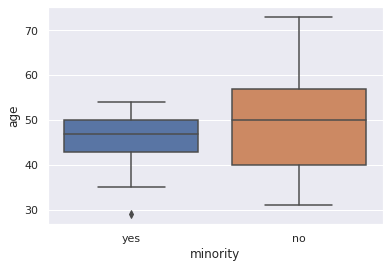

In [45]:
## insert code
sns.boxplot(x = 'minority' , y = 'age' , data = ratings_df)

Double-click **here** for a hint.

<!-- The hint is below:
Remember that the positions of the argument determine whether it will be vertical or horizontal
-->


Double-click **here** for the solution.

<!-- The answer is below:
ax = sns.boxplot(x="age", y="minority", data=ratings_df)
-->


### Question 3: Create a group histogram of tenure by minority and add the gender factor


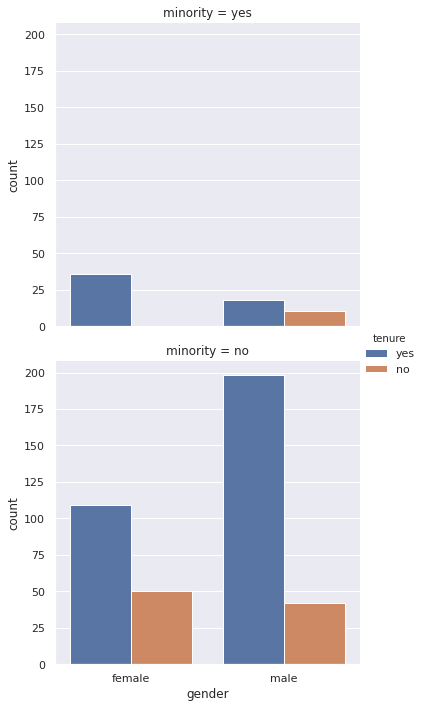

In [49]:
## insert code
sns.catplot(x = 'gender' , hue = 'tenure' , row = 'minority' , kind = 'count' , data = ratings_df)

Double-click **here** for the solution.

<!-- The answer is below:
sns.catplot(x='tenure', hue = 'minority', row = 'gender',
            kind='count', data=ratings_df,
            height = 3, aspect = 2)
-->


### Question 4: Create a boxplot of the age variable


<AxesSubplot:ylabel='age'>

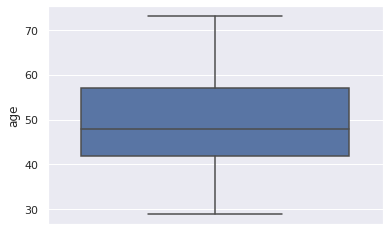

In [53]:
## insert code
sns.boxplot(y =  ratings_df['age'] )

Double-click **here** for the solution.

<!-- The answer is below:
## you only habve to specify the y-variable
ax = sns.boxplot(y="age", data=ratings_df)
-->


## Authors


[Aije Egwaikhide](https://www.linkedin.com/in/aije-egwaikhide?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork-20531532&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ) is a Data Scientist at IBM who holds a degree in Economics and Statistics from the University of Manitoba and a Post-grad in Business Analytics from St. Lawrence College, Kingston. She is a current employee of IBM where she started as a Junior Data Scientist at the Global Business Services (GBS) in 2018. Her main role was making meaning out of data for their Oil and Gas clients through basic statistics and advanced Machine Learning algorithms. The highlight of her time in GBS was creating a customized end-to-end Machine learning and Statistics solution on optimizing operations in the Oil and Gas wells. She moved to the Cognitive Systems Group as a Senior Data Scientist where she will be providing the team with actionable insights using Data Science techniques and further improve processes through building machine learning solutions. She recently joined the IBM Developer Skills Network group where she brings her real-world experience to the courses she creates.


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By      | Change Description                     |
| ----------------- | ------- | --------------- | -------------------------------------- |
| 2020-08-14        | 0.1     | Aije Egwaikhide | Created the initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork-20531532&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork-20531532&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork-20531532&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork-20531532&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
